##데이터 불러오기

In [548]:
import pandas as pd
import numpy as np
import seaborn as sns

df_origin = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv")
df = df_origin
df.head(15)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [549]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib as mpl

# 폰트 변환
# Windows
# mpl.rc("font", family='Malgun Gothic')

# MacOS
mpl.rc("font", family='AppleGothic')

# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

warnings.filterwarnings("ignore")
%matplotlib inline

# 첫번째 방법
%config InlineBackend.figure_format='retina'

# 두번째 방법
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

## EDA

#### 데이터 타입 확인 및 변경

In [550]:
#데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [551]:
#불필요한 첫 번째 열 "Unnamed" 제거
df = df.drop(df.columns[[0]], axis=1)

In [552]:
#년도 오류 수정
df.loc[df["Year"]<=22,"Year"] += 2000
df.loc[df["Year"]<=99,"Year"] += 1900

#소수점 1자리에서 반올림
df["Year"] = round(df["Year"])

In [553]:
#Sales 오류값 "K" 및 "M" 수정
df["NA_Sales"] = df["NA_Sales"].str.replace("M","")
df["EU_Sales"] = df["EU_Sales"].str.replace("M","")
df["JP_Sales"] = df["JP_Sales"].str.replace("M","")
df["Other_Sales"] = df["Other_Sales"].str.replace("M","")

df.loc[df.NA_Sales.str.contains("K"),"NA_Sales"] = pd.to_numeric(df.loc[df.NA_Sales.str.contains("K"),"NA_Sales"].str.replace("K",""))/1000
df.loc[df.EU_Sales.str.contains("K"),"EU_Sales"] = pd.to_numeric(df.loc[df.EU_Sales.str.contains("K"),"EU_Sales"].str.replace("K",""))/1000
df.loc[df.JP_Sales.str.contains("K"),"JP_Sales"] = pd.to_numeric(df.loc[df.JP_Sales.str.contains("K"),"JP_Sales"].str.replace("K",""))/1000
df.loc[df.Other_Sales.str.contains("K"),"Other_Sales"] = pd.to_numeric(df.loc[df.Other_Sales.str.contains("K"),"Other_Sales"].str.replace("K",""))/1000

In [554]:
#sales 값 object에서 float으로 타입 변경
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'],errors = 'coerce') #coerce = 오류값 nan값으로 대체
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'],errors = 'coerce')
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'],errors = 'coerce')
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'],errors = 'coerce')

#Total_sales 칼럼을 새로 만든다.
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [555]:
#Total_sales가 0인 행 확인
condition = df["Total_Sales"]<=0
# print("Total_sales가 0인 행\n",df[condition].count(),"\n")
print("Sales 0값 제거 전 데이터:", df.shape)

#Total Sales가 0인 데이터도 삭제
df.drop(df.loc[df["Total_Sales"] == 0].index, inplace = True) 
print("Sales 0값 제거 후 데이터:",df.shape,"\n")

Sales 0값 제거 전 데이터: (16598, 10)
Sales 0값 제거 후 데이터: (16597, 10) 



#### 결측치 확인 및 제거

In [556]:
#결측치 확인
print("결측치:\n",df.isnull().sum(),"\n") 

print("결측치 제거 전 데이터:",df.shape)

df = df.dropna(axis = 0) #결측치가 포함된 모든 행 제거
df = df.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='') #인덱스 reset

print("결측치 제거 후 데이터:",df.shape)


결측치:
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64 

결측치 제거 전 데이터: (16597, 10)
결측치 제거 후 데이터: (16240, 10)


#### 중복 데이터 값 확인 및 제거

In [557]:
#duplicated 게임이름 검색하여 확인
df.duplicated().sum()

#모든 값이 동일한 데이터가 없기 때문에 제거 대상 없음

0

In [558]:
#Year 'int' 타입으로 변환
df['Year'].astype('int64')

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16235    2006
16236    2005
16237    2015
16238    2013
16239    1996
Name: Year, Length: 16240, dtype: int64

##지역에 따라서 선호하는 게임 장르

NA_Sales: 11820
EU_Sales: 10634
JP_Sales: 6068
Other_Sales: 9922 

NA_Sales       4307.04
EU_Sales       2393.57
JP_Sales       1271.39
Other_Sales     783.37
dtype: float64


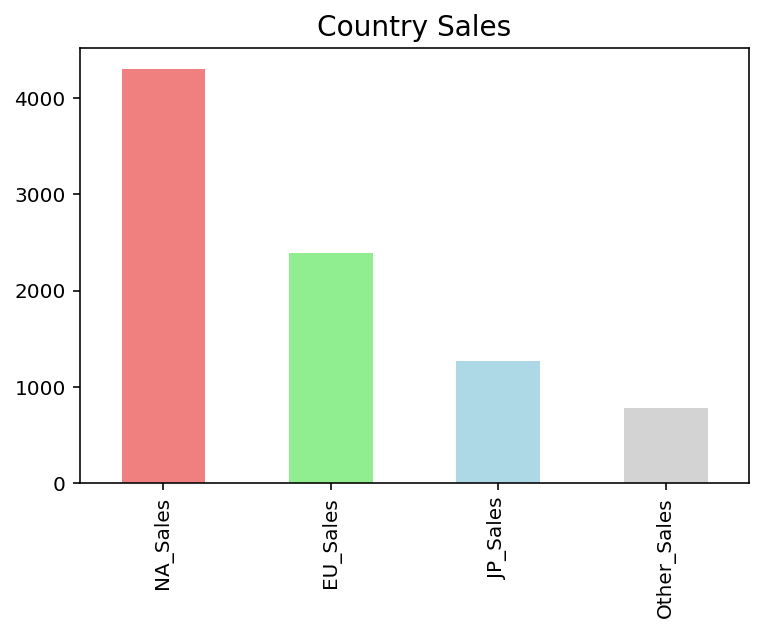

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Sports,667.26,370.97,134.76,132.35
Shooter,574.48,310.23,38.18,101.86
Role-Playing,318.76,183.09,342.93,56.73
Platform,445.38,200.63,130.53,51.45
Misc,394.73,208.15,104.18,72.64
Racing,354.70,235.02,56.32,76.51
Fighting,220.35,99.90,87.14,36.15
Simulation,181.43,112.99,63.54,31.32


In [559]:
#지역별 sales값 확인
print("NA_Sales:",df[df["NA_Sales"] > 0].value_counts().sum())
print("EU_Sales:",df[df["EU_Sales"] > 0].value_counts().sum())
print("JP_Sales:",df[df["JP_Sales"] > 0].value_counts().sum())
print("Other_Sales:",df[df["Other_Sales"] > 0].value_counts().sum(),"\n")

df_hist_area = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
print(df_hist_area)

df_hist_area.plot.bar(color=["lightcoral","lightgreen","lightblue","lightgray"])
plt.title('Country Sales',fontsize=14) ## 타이틀 출력
plt.show()

#지역별 국가가 선호하는 장르 순위(출고량 합산 값)
df.groupby(["Genre"],axis=0, sort = True).sum().sort_values(by = ["Total_Sales"],ascending = False)[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].head(10)

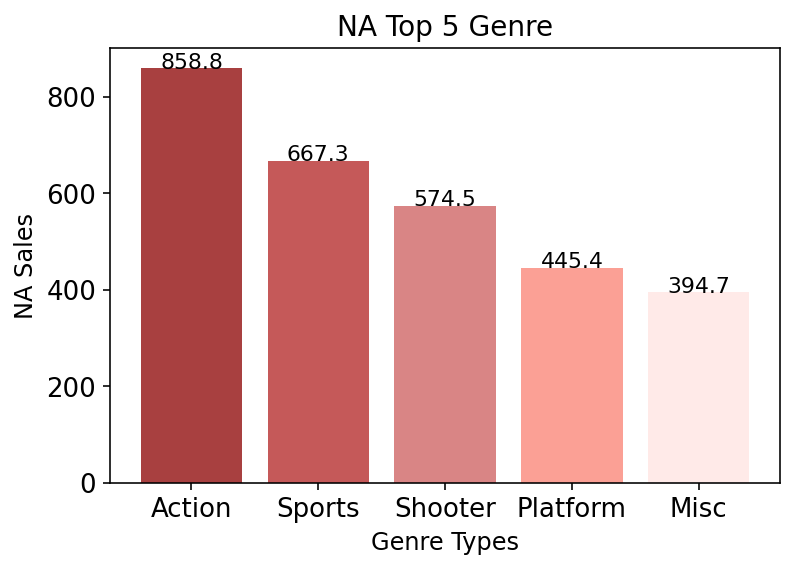

In [560]:
#미국이 선호하는 장르 순위(출고량 합산 값)
df_NA = df.groupby(["Genre"],axis=0, sort = True).sum()["NA_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_US)) ## 색상 지정
 
xtick_label_position = list(range(len(df_NA))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_NA.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_NA, color=["darkred","firebrick","indianred","salmon","mistyrose"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_NA[i],1),ha='center',fontsize=11)
    
plt.title('NA Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('NA Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

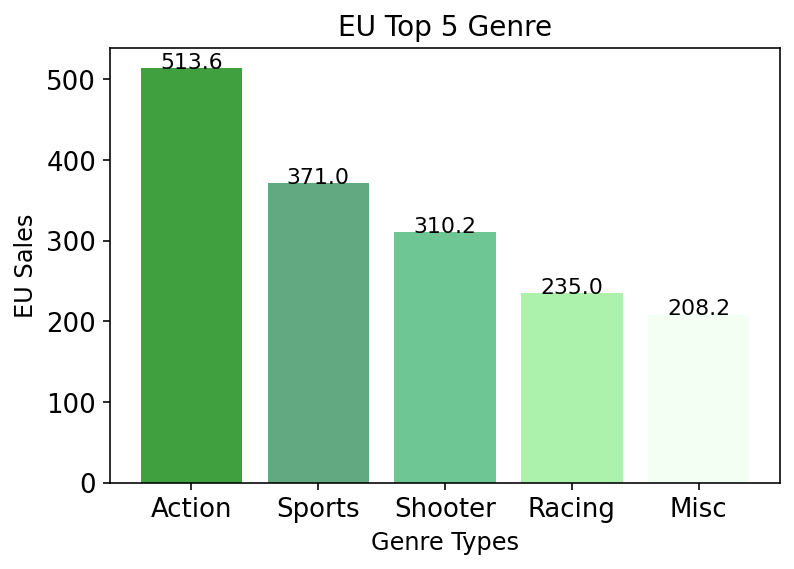

In [561]:
#유럽연합이 선호하는 장르 순위
df_EU = df.groupby(["Genre"],axis=0, sort = True).sum()["EU_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_EU))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_EU.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_EU, color=["green","seagreen","mediumseagreen","lightgreen","honeydew"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_EU[i],1),ha='center',fontsize=11)
    
plt.title('EU Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('EU Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

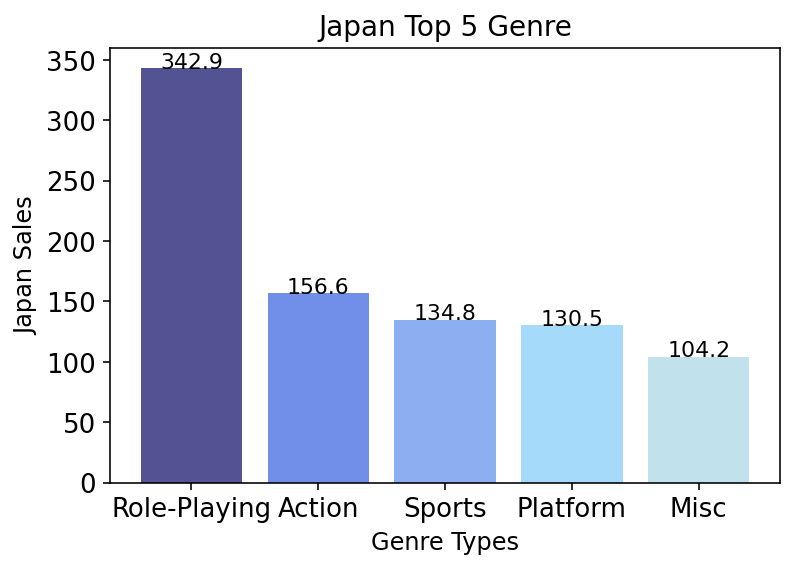

In [562]:
#일본이 선호하는 장르 순위
df_JP = df.groupby(["Genre"],axis=0, sort = True).sum()["JP_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_JP))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_JP.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_JP, color=["midnightblue","royalblue","cornflowerblue","lightskyblue","lightblue"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_JP[i],1),ha='center',fontsize=11)
    
plt.title('Japan Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Japan Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

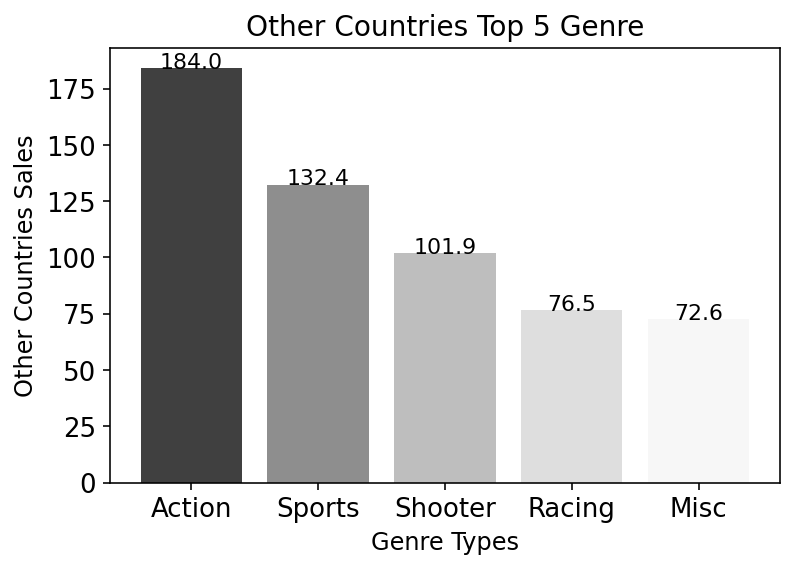

In [563]:
#기타국가가 선호하는 장르 순위
df_Others = df.groupby(["Genre"],axis=0, sort = True).sum()["Other_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 12 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_Others))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_Others.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_Others, color=["black","dimgray","darkgray","lightgray","whitesmoke"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_Others[i],1),ha='center',fontsize=11)
    
plt.title('Other Countries Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Other Countries Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

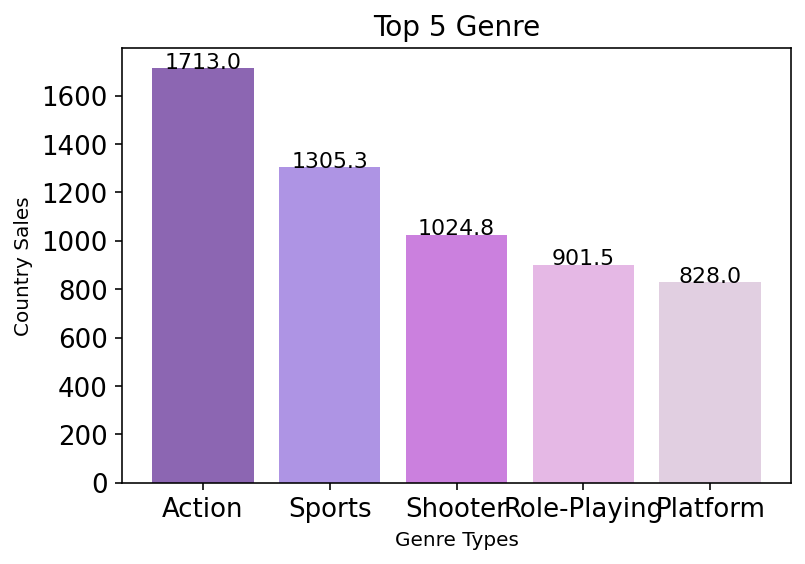

In [564]:
#전체지역이 선호하는 장르 순위 (5396)
df_Total = df.groupby(["Genre"],axis=0, sort = True).sum()["Total_Sales"].sort_values(ascending = False).head(5)

## 시각화
tick_size = 13 ## 눈금 폰트 사이즈
axis_label_size = 10 ## x축, y축 폰트 사이즈
 
fig = plt.figure(figsize=(6,4)) ## Figure 생성 사이즈는 10 by 10
ax = fig.add_subplot() ## Axes 추가
# colors = sns.color_palette('hls',len(df_EU)) ## 색상 지정
 
xtick_label_position = list(range(len(df_Total))) ## x축 눈금 라벨이 표시될 x좌표
 
plt.yticks(fontsize=tick_size)
plt.xticks(xtick_label_position, df_Total.index, fontsize=tick_size) ## x축 눈금 라벨 출력
 
bars = plt.bar(xtick_label_position, df_Total, color=["rebeccapurple","mediumpurple","mediumorchid","plum","thistle"], alpha=0.75, linewidth=3) ## 바차트 출력
 
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.1, \
            round(df_Total[i],1),ha='center',fontsize=11)
    
plt.title('Top 5 Genre',fontsize=14) ## 타이틀 출력
plt.xlabel('Genre Types',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylabel('Country Sales',fontsize=axis_label_size) ## y축 라벨 출력
plt.show()

In [565]:
df_Total = df.groupby(["Genre"],axis=0, sort = True).sum()["Total_Sales"].sort_values(ascending = False)
df_Total.sum()

8755.369999999999

##연도별 게임의 트렌드

In [566]:
#년도 별 출고량이 가장 높은 장르
df_Year = pd.DataFrame(df.groupby(['Year','Genre'])["Total_Sales"].sum()).reset_index().sort_values(by=["Year","Total_Sales"],ascending=[True,False])
Table_Year = pd.pivot_table(df_Year, values="Total_Sales", index=["Year"], columns="Genre") #pivot_table을 이용해서 테이블 만들기
Table_Year = Table_Year.iloc[:-1] # 마지막 행 데이터 부족으로 삭제
Table_Year = Table_Year.fillna(0) #nan값 0으로 대체
Table_Year.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0
1981.0,14.79,0.0,0.00,0.00,6.92,2.25,0.48,0.0,10.02,0.44,0.78,0.0
1982.0,6.50,0.0,0.00,0.87,5.03,10.04,1.57,0.0,3.81,0.00,1.06,0.0
1983.0,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.49,0.00,3.20,0.0
1984.0,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.17,0.0


In [567]:
df_Year_His = pd.DataFrame(df.groupby('Year')["Total_Sales"].sum()).reset_index().sort_values(by="Year",ascending=True)
df_Year_His.head()

,Year,Total_Sales
0,1980.0,10.88
1,1981.0,35.68
2,1982.0,28.88
3,1983.0,16.80
4,1984.0,50.35


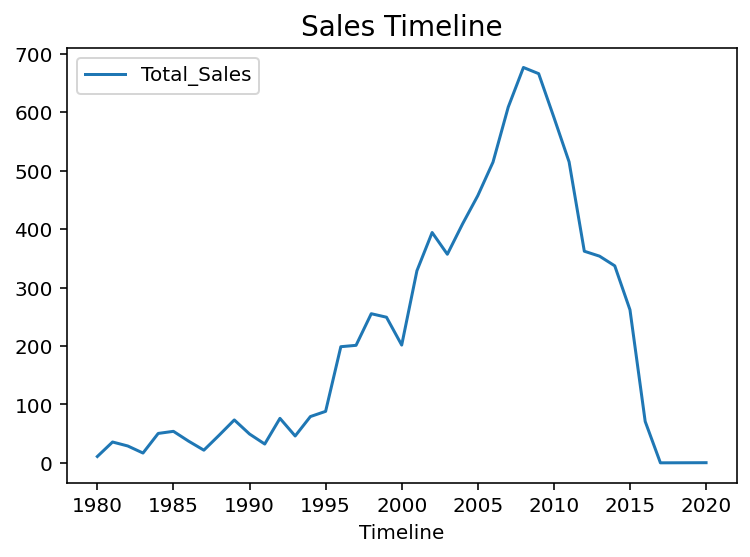

In [568]:
df_Year_His.plot.line(x="Year", y="Total_Sales")
plt.title('Sales Timeline',fontsize=14) ## 타이틀 출력
plt.xlabel('Timeline',fontsize=axis_label_size) ## x축 라벨 출력
plt.show()

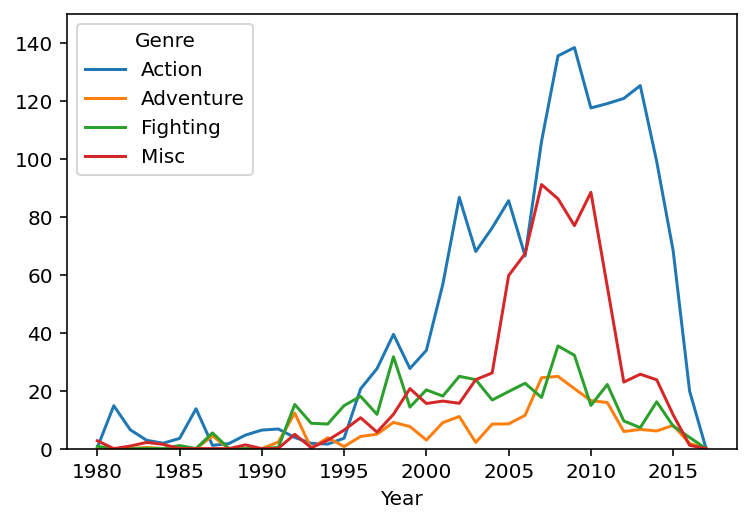

In [569]:
Table_Year.iloc[:,0:4].plot.line()
plt.ylim((0,150))
plt.show()

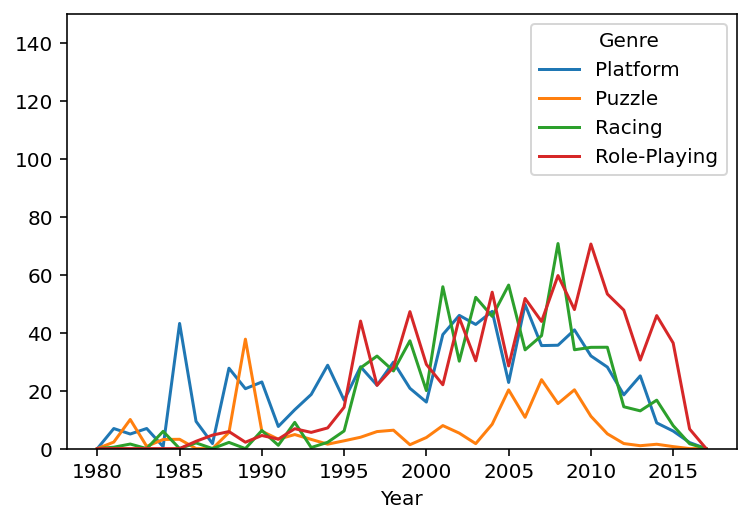

In [570]:
Table_Year.iloc[:,4:8].plot.line()
plt.ylim((0,150))
plt.show()

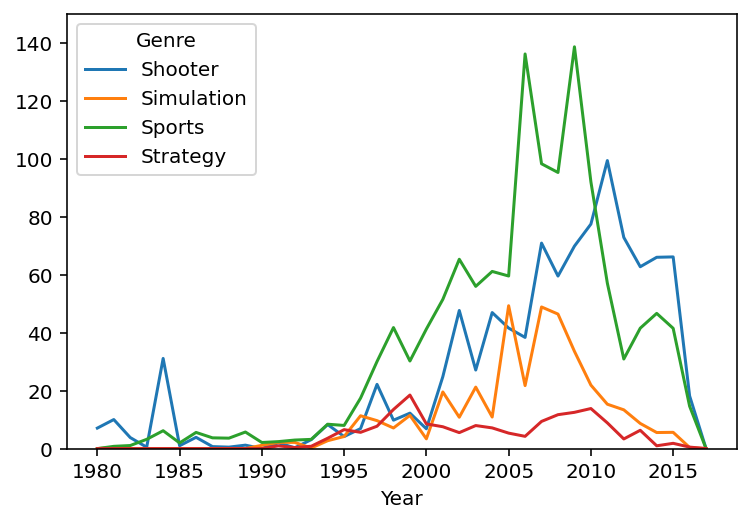

In [571]:
Table_Year.iloc[:,8:12].plot.line()
plt.ylim((0,150))
plt.show()

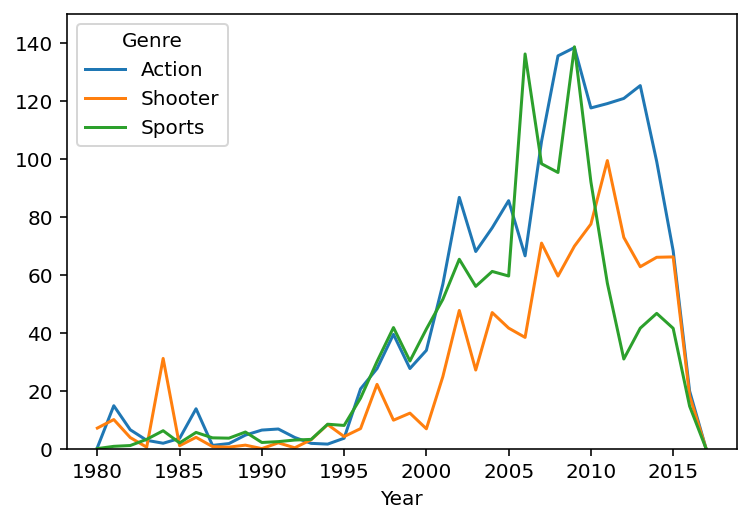

In [572]:
# Action	Adventure	Fighting	Misc	Platform	Puzzle	Racing	Role-Playing	Shooter	Simulation	Sports
Table_Year[["Action","Shooter","Sports"]].plot.line()
plt.ylim((0,150))
plt.show()

In [573]:
#년도 별 출고량이 가장 높은 장르
df_Year = pd.DataFrame(df.groupby(['Year','Genre'])["Total_Sales"].sum()).reset_index().sort_values(by=["Year","Total_Sales"],ascending=[True,False])
df_Year_Sum = df_Year.groupby(["Year"])["Total_Sales"].sum().reset_index()
df_Year = df_Year.groupby("Year").head(1).reset_index(drop=True)

#Column 이름 바꿔주기
df_Year_Sum.rename(columns = {"Total_Sales":"Sum_sales"},inplace=True)

#두 프레임 Merge
df_Year = pd.merge(df_Year, df_Year_Sum, on="Year")
df_Year.reset_index(drop=True)

df_Year["Proportion(%)"] = round(df_Year["Total_Sales"]/(df_Year["Sum_sales"])*100,2)
df_Year = df_Year.iloc[:-1]

df_Year.head(5)

,Year,Genre,Total_Sales,Sum_sales,Proportion(%)
0,1980.0,Shooter,7.07,10.88,64.98
1,1981.0,Action,14.79,35.68,41.45
2,1982.0,Puzzle,10.04,28.88,34.76
3,1983.0,Platform,6.93,16.80,41.25
4,1984.0,Shooter,31.10,50.35,61.77


In [574]:
df_Year_Prop = df_Year.iloc[:,[0,1,4]]
df_Year_Prop.head()

,Year,Genre,Proportion(%)
0,1980.0,Shooter,64.98
1,1981.0,Action,41.45
2,1982.0,Puzzle,34.76
3,1983.0,Platform,41.25
4,1984.0,Shooter,61.77


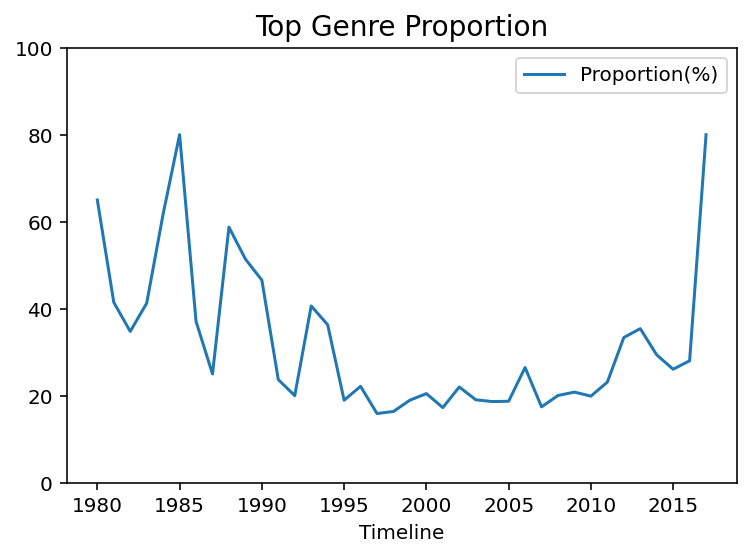

In [575]:
df_Year_Prop.plot.line(x="Year", y="Proportion(%)")
plt.title('Top Genre Proportion',fontsize=14) ## 타이틀 출력
plt.xlabel('Timeline',fontsize=axis_label_size) ## x축 라벨 출력
plt.ylim((0,100))
plt.show()

##출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [576]:
#출고량이 가장 높은 게임
df_Sales = pd.DataFrame(df.groupby(["Name","Genre","Platform","Publisher"])["Total_Sales"].sum()).reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales.head(10)

,Name,Genre,Platform,Publisher,Total_Sales
15588,Wii Sports,Sports,Wii,Nintendo,82.74
13088,Super Mario Bros.,Platform,NES,Nintendo,40.24
7766,Mario Kart Wii,Racing,Wii,Nintendo,35.83
15590,Wii Sports Resort,Sports,Wii,Nintendo,33.00
10287,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo,31.38
13590,Tetris,Puzzle,GB,Nintendo,30.26
9501,New Super Mario Bros.,Platform,DS,Nintendo,30.01
15586,Wii Play,Misc,Wii,Nintendo,29.01
9504,New Super Mario Bros. Wii,Platform,Wii,Nintendo,28.61
3609,Duck Hunt,Shooter,NES,Nintendo,28.31


In [577]:
df_Sales.describe()

,Total_Sales
count,16237.000000
mean,0.539223
std,1.564157
min,0.010000
25%,0.060000
50%,0.170000
75%,0.480000
max,82.740000


In [578]:
#데이터의 상위 25%, 10%, 1%, 0.1% 를 각각 나누어서 새로운 데이터에 담는다.
df_Sales_All = df_Sales
df_Sales_25p = df_Sales.head(round(len(df_Sales)*0.25))
df_Sales_10p = df_Sales.head(round(len(df_Sales)*0.1))
df_Sales_1p = df_Sales.head(round(len(df_Sales)*0.01))
df_Sales_01p = df_Sales.head(round(len(df_Sales)*0.001))
df_Sales_All.head()


,Name,Genre,Platform,Publisher,Total_Sales
15588,Wii Sports,Sports,Wii,Nintendo,82.74
13088,Super Mario Bros.,Platform,NES,Nintendo,40.24
7766,Mario Kart Wii,Racing,Wii,Nintendo,35.83
15590,Wii Sports Resort,Sports,Wii,Nintendo,33.00
10287,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo,31.38


In [579]:
#출고량이 높은 각각의 데이터들의 장르별 출고량을 나타낸 데이터 프레임 만들기
df_Sales_All_Genre = df_Sales_All.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_25p_Genre = df_Sales_25p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_10p_Genre = df_Sales_10p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_1p_Genre = df_Sales_1p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Genre = df_Sales_01p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_All_Genre.head()

,Genre,Total_Sales
0,Action,1712.98
10,Sports,1305.34
8,Shooter,1024.75
7,Role-Playing,901.51
4,Platform,827.99


In [580]:
#출고량이 높은 각각의 데이터들을 플렛폼별 출고량을 나타낸 데이터 프레임 만들기
df_Sales_All_Genre = df_Sales_All.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_25p_Genre = df_Sales_25p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_10p_Genre = df_Sales_10p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_1p_Genre = df_Sales_1p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Genre = df_Sales_01p.groupby("Genre")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Genre.head()

df_Sales_25p_Genre.rename(columns = {"Total_Sales":"25(%)"},inplace=True)
df_Sales_10p_Genre.rename(columns = {"Total_Sales":"10(%)"},inplace=True)
df_Sales_1p_Genre.rename(columns = {"Total_Sales":"1(%)"},inplace=True)
df_Sales_01p_Genre.rename(columns = {"Total_Sales":"0.1(%)"},inplace=True)

#여러개의 데이터 프레임 Merge 해주기
df_Sales_Genre = pd.merge(df_Sales_25p_Genre, df_Sales_10p_Genre, how="outer", suffixes=('_25', '_10'))
df_Sales_Genre = pd.merge(df_Sales_Genre, df_Sales_1p_Genre, how="outer", suffixes=('_10', '_1'))
df_Sales_Genre = pd.merge(df_Sales_Genre, df_Sales_01p_Genre, how="outer", suffixes=('_1', '_01'))
df_Sales_Genre.rename(columns = {"Total_Sales_25":"25(%)","Total_Sales_10":"10(%)","Total_Sales_1":"1(%)","Total_Sales_01":"0.1(%)"}, inplace=True)
df_Sales_Genre.set_index("Genre",inplace = True)
df_Sales_Genre

,25(%),10(%),1(%),0.1(%)
Genre,,,,
Action,1342.26,960.31,256.78,NaN
Sports,1031.09,704.99,210.24,160.46
Shooter,900.50,714.08,323.23,28.31
Role-Playing,746.23,582.59,241.45,54.47
Platform,737.20,611.22,301.69,98.86
Racing,589.60,432.54,186.95,59.26
Misc,584.18,426.83,138.33,50.83
Fighting,348.40,243.12,52.31,NaN
Simulation,293.63,202.54,59.96,24.75


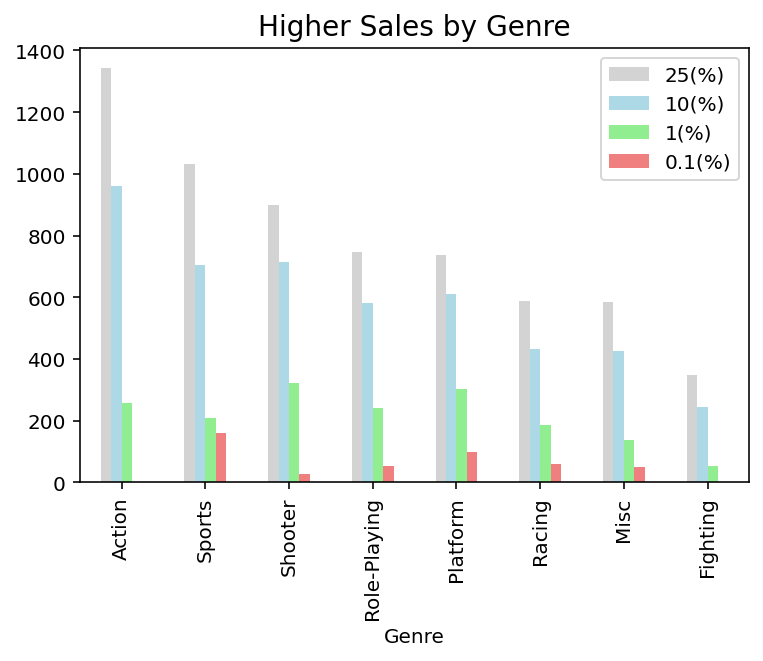

In [581]:
df_Sales_Genre_top8 = df_Sales_Genre.iloc[:8]

df_Sales_Genre_top8.plot.bar(color=["lightgray","lightblue","lightgreen","lightcoral"])
plt.title('Higher Sales by Genre',fontsize=14) ## 타이틀 출력
plt.show()

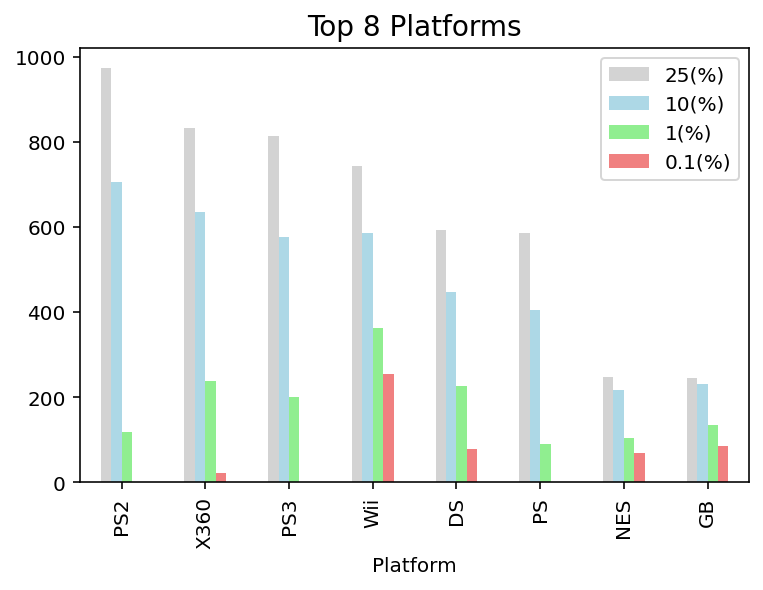

In [582]:
#출고량이 높은 각각의 데이터들을 출판사별 출고량을 나타낸 데이터 프레임 만들기
df_Sales_All_Platform = df_Sales_All.groupby("Platform")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_25p_Platform = df_Sales_25p.groupby("Platform")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_10p_Platform = df_Sales_10p.groupby("Platform")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_1p_Platform = df_Sales_1p.groupby("Platform")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Platform = df_Sales_01p.groupby("Platform")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Platform.head()

#feature 이름 바꿔주기
df_Sales_25p_Platform.rename(columns = {"Total_Sales":"25(%)"},inplace=True)
df_Sales_10p_Platform.rename(columns = {"Total_Sales":"10(%)"},inplace=True)
df_Sales_1p_Platform.rename(columns = {"Total_Sales":"1(%)"},inplace=True)
df_Sales_01p_Platform.rename(columns = {"Total_Sales":"0.1(%)"},inplace=True)

#여러개의 데이터 프레임 Merge 해주기
df_Sales_Platform = pd.merge(df_Sales_25p_Platform, df_Sales_10p_Platform, how="outer", suffixes=('_25', '_10'))
df_Sales_Platform = pd.merge(df_Sales_Platform, df_Sales_1p_Platform, how="outer", suffixes=('_10', '_1'))
df_Sales_Platform = pd.merge(df_Sales_Platform, df_Sales_01p_Platform, how="outer", suffixes=('_1', '_01'))
df_Sales_Platform.rename(columns = {"Total_Sales_25":"25(%)","Total_Sales_10":"10(%)"}, inplace=True)
df_Sales_Platform.rename(columns = {"Total_Sales_1":"1(%)","Total_Sales_01":"0.1(%)"}, inplace=True)
df_Sales_Platform.set_index("Platform",inplace = True)
df_Sales_Platform

df_Sales_Platform_top8 = df_Sales_Platform.iloc[:8]

#bar plot으로 시각화
df_Sales_Platform_top8.plot.bar(color=["lightgray","lightblue","lightgreen","lightcoral"])
plt.title("Top 8 Platforms",fontsize=14) ## 타이틀 출력
plt.show()

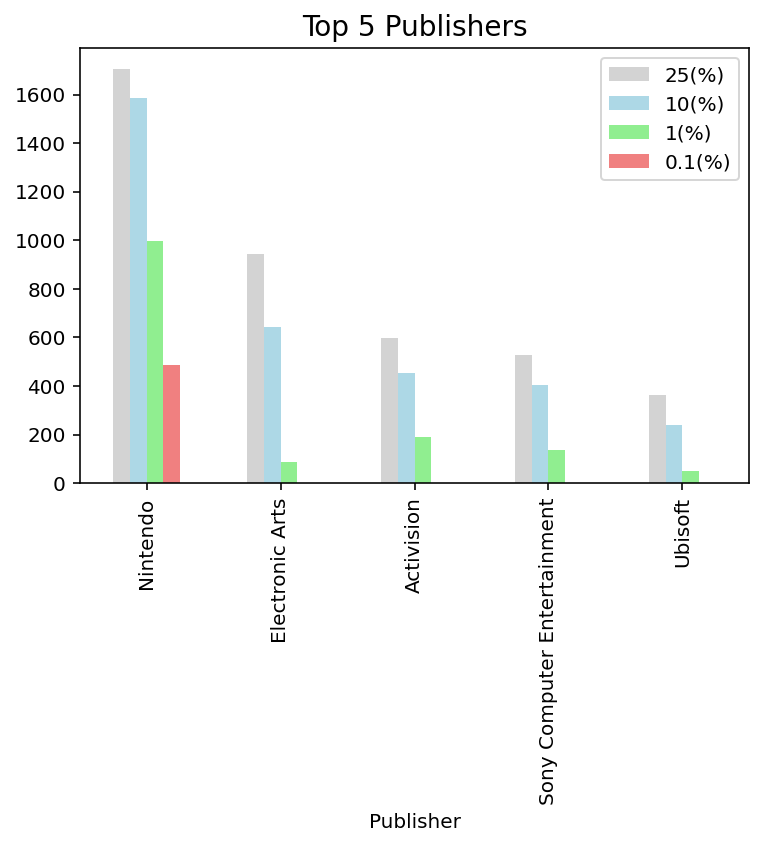

In [583]:
#출고량이 높은 각각의 데이터들을 플렛폼별 출고량을 나타낸 데이터 프레임 만들기
df_Sales_All_Publisher = df_Sales_All.groupby("Publisher")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_25p_Publisher = df_Sales_25p.groupby("Publisher")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_10p_Publisher = df_Sales_10p.groupby("Publisher")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_1p_Publisher = df_Sales_1p.groupby("Publisher")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Publisher = df_Sales_01p.groupby("Publisher")["Total_Sales"].sum().reset_index().sort_values(by=["Total_Sales"],ascending=[False])
df_Sales_01p_Publisher.head()

df_Sales_25p_Publisher.rename(columns = {"Total_Sales":"25(%)"},inplace=True)
df_Sales_10p_Publisher.rename(columns = {"Total_Sales":"10(%)"},inplace=True)
df_Sales_1p_Publisher.rename(columns = {"Total_Sales":"1(%)"},inplace=True)
df_Sales_01p_Publisher.rename(columns = {"Total_Sales":"0.1(%)"},inplace=True)

#여러개의 데이터 프레임 Merge 해주기
df_Sales_Publisher = pd.merge(df_Sales_25p_Publisher, df_Sales_10p_Publisher, how="outer", suffixes=('_25', '_10'))
df_Sales_Publisher = pd.merge(df_Sales_Publisher, df_Sales_1p_Publisher, how="outer", suffixes=('_10', '_1'))
df_Sales_Publisher = pd.merge(df_Sales_Publisher, df_Sales_01p_Publisher, how="outer", suffixes=('_1', '_01'))
df_Sales_Publisher.rename(columns = {"Total_Sales_25":"25(%)","Total_Sales_10":"10(%)","Total_Sales_1":"1(%)","Total_Sales_01":"0.1(%)"}, inplace=True)
df_Sales_Publisher.set_index("Publisher",inplace = True)
df_Sales_Publisher

#Top 5 publisher
df_Sales_Publisher = df_Sales_Publisher.iloc[0:5]

#bar plot으로 시각화
df_Sales_Publisher.plot.bar(color=["lightgray","lightblue","lightgreen","lightcoral"])
plt.title('Top 5 Publishers',fontsize=14) ## 타이틀 출력
plt.show()